In [379]:
import numpy as np
import matplotlib.pyplot as plt

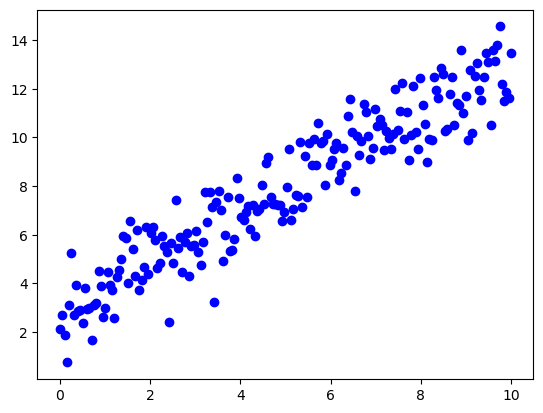

In [380]:
import numpy as np
import matplotlib.pyplot as plt

# y = 1*x + 3
# y = a*x + b
# 0 < x < 10

#Al cambiar los valores cambia la inclinación
a = 1
b = 3

lx = np.linspace(0, 10, 200)
ly = a*lx + b

ruido = np.random.randn(200)
ly = ly + ruido

plt.scatter(lx, ly, color="b")

In [381]:
#Cogemos dos valores al azar

a = 10
b = 9

In [382]:

def predice(x):
  y_hat = a*x + b
  return y_hat

# se pasan las x y las y reales y devulve el array de errores de cada x
def error(x, y):
  y_hat = predice(x)
  err = y_hat - y
  return err

# se le pasan las x y las y reales y devuelve el coste cuadrático medio
# 1/(2n) * ∑(yi_hat - yi)²
def coste(x, y):
  err = error(x, y)
  c = err**2
  c = c.mean()
  c = c/2
  return c

#1/n ∑(yi_hat -yi)*xi
def deriva_coste_respecto_a(x, y):
  err = error(x,y)
  d = err*x
  d = d.mean()
  return d

#1/n ∑(yi_hat -yi)=err
def deriva_coste_respecto_b(x, y):
  d = error(x,y)
  d = d.mean()
  return d


[0.50251256 2.51256281 5.02512563]
[2.35395197 4.84627464 7.97142727]
[11.67117366 29.2793535  51.27982901]


603.852949767096

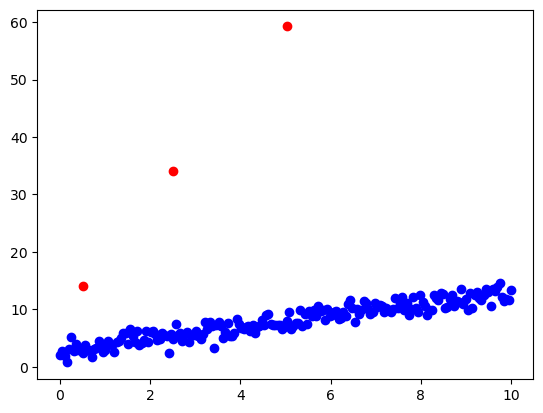

In [383]:
plt.scatter(lx, ly, color="b")

#Se coge tres valores de forma al azar en este caso 10,50,100 para comprobar el margen de error que tiene el modelo
#pru_x dará el margen de error
#pru_y dará el margen de error en el eje Y
#Entonces la idea es que converjan todas juntas
pru_x = np.array([lx[10], lx[50], lx[100]])
pru_y = np.array([ly[10], ly[50], ly[100]])
print(pru_x)
print(pru_y)

#Aquí con dos posiciones el ejemplo X=5 y Y=5 nos dice el error que ha respecto a la recta
y_hat = predice(pru_x)

plt.scatter(pru_x,y_hat,color="r")
le = error(pru_x,pru_y)

#Este es el rango de error que tiene los puntos en respecto al resto 
print(le)

#El costo de los márgenes de error
c = (coste(pru_x,pru_y))
c

Metrica de error : Si lo que queremos es predecir un número real lo más habitual es que sea el error métrico cuadrado (MSE) donde tendremos dos casos,

Cuando intentamos predecir un número

Cuando intentamos predecir una clase como en una foto

**C = 1/2 (y^ - y)^2**

Y^ = Error

(y^ - y) pueden ser varios por lo que suele hacerse la media

Derivada del coste calculado respecto a Y = **C = (y^ - y)**

y = ax + b

sabemos la derivada del coste respecto a Y

**y sabemos la derivada de dy/da = x**

Utilizamos la regla de la cadena

**dc/da = dc/dy * dy/da**

dc/da = (y^ - y) * x

dc/db = dc/dy * dy/b


**RESUMEN SI PUEDE VARIAR DOS VALORES**

Descenso de gradiente = derivada_coste_respecto_a * derivada_coste_respecto_b * ...

Descenso de gradiente = (y^ - y) * x * 1



In [384]:
# Learning rate 
pru_x = lx
pru_y = ly
lr = 0.01
a = 10
b = 9

In [385]:
# Vamos mirar los errores en esa posición con 3 puntos

def fit(x_train, y_train, lr = 0.01, epochs=100):
  global a, b
  la = []
  lb = []
  lloss = []
  for _ in range(epochs):
    #DERIVADA DE CADA VALOR DE ENTRENO
    da = deriva_coste_respecto_a(x_train, y_train)
    db = deriva_coste_respecto_b(x_train, y_train)
    a = a - lr*da
    b = b - lr*db
    loss = coste(x_train, y_train)
    la.append(a); lb.append(b); lloss.append(loss)
    print(f"a: {a}  b: {b} loss: {loss}")
  return lloss, la, lb

# Si volvemos al gráfico vemos que se va acercando al valor seleccionado    
# Vemos que la perdida va disminuyendo el coste en este caso Perdida donde B y A se van acercando a su valor

a: 6.6908561187986635  b: 8.489354952655924 loss: 714.198342837448
a: 4.513063927652414  b: 8.149273549845358 loss: 311.3608074247681
a: 3.0800304835875254  b: 7.921482570620208 loss: 136.7839642572008
a: 2.137264598686482  b: 7.7676211733905545 loss: 61.12367128181736
a: 1.517236664782195  b: 7.66243668437825 loss: 28.328790805473332
a: 1.1096632196734233  b: 7.589305436951283 loss: 14.10962558874679
a: 0.8419455032663181  b: 7.537284174254024 loss: 7.940262651637239
a: 0.6662923079894151  b: 7.499169010004093 loss: 5.259309339729055
a: 0.5512430492461847  b: 7.470217657160506 loss: 4.090091129228528
a: 0.47608746722264533  b: 7.447308280782517 loss: 3.5760181725761893
a: 0.4271921590660726  b: 7.428385777269485 loss: 3.345888049324712
a: 0.39558236298169464  b: 7.412097264199411 loss: 3.2388404318677146
a: 0.37535006511168034  b: 7.397552126064257 loss: 3.18516650125095
a: 0.362606068411519  b: 7.384164054203955 loss: 3.154657842464086
a: 0.35479014756849697  b: 7.371547062897265 los

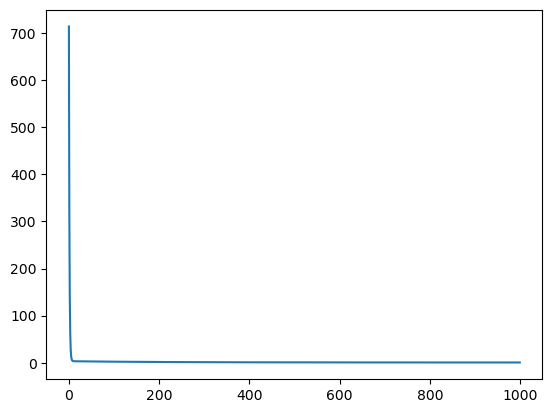

In [386]:
lloss, la, lb = fit(lx, ly, epochs=1000)
plt.plot(range(len(lloss)), lloss)